## Exploratory Data Analysis

### Setup

In [ ]:
# uncomment to install libraries
# !pip install -r ../eda_requirements.txt

In [2]:
# import dependencies
import numpy as np
import pandas as pd
import polars as pl
import math
import re
from collections import Counter

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx

In [ ]:
# load dataset
X_path = '../Data/challenger_splits/train_X.csv'
y_path = '../Data/challenger_splits/train_y.csv'
train_X = pl.read_csv(X_path)
train_y = pl.read_csv(y_path)

df = train_X.hstack(train_y)

In [7]:
df

User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Zip_str,DateTime,Date,Hour,User_card,State,FICO Score,Yearly Income - Person,Total Debt,Num Credit Cards,Card Brand,Credit Limit,Card on Dark Web,amount_is_refund,amount_log,hour_angle,hour_sin,hour_cos,card_kappa,von_mises_likelihood_card,Is Fraud?
i64,i64,i64,i64,i64,str,f64,str,i64,str,bool,f64,i64,str,str,str,str,i64,str,str,i64,f64,f64,i64,str,f64,str,i64,f64,f64,f64,f64,f64,f64,i64
716,0,2011,12,4,"""13:53""",9.07,"""Swipe Transaction""",6780853441840436625,"""Fremont""",false,94536.0,7210,null,"""945""","""2011-12-04T13:53:00.000000""","""2011-12-04""",13,"""716_0""","""CA""",798,68765.0,75608.0,5,"""Mastercard""",39751.0,"""No""",0,2.309561,-1.354666,-0.976735,0.214451,0.437183,1.285982,0
835,3,2012,8,18,"""10:41""",52.6,"""Swipe Transaction""",6042526206085641250,"""Bronx""",false,10456.0,5912,null,"""104""","""2012-08-18T10:41:00.000000""","""2012-08-18""",10,"""835_3""","""NY""",712,25434.0,45540.0,4,"""Mastercard""",10500.0,"""No""",0,3.981549,-2.155191,-0.834046,-0.551694,0.437183,0.921731,0
1761,0,2009,8,22,"""21:03""",15.85,"""Swipe Transaction""",6246550243095942766,"""Cocoa""",false,32926.0,5921,null,"""329""","""2009-08-22T21:03:00.000000""","""2009-08-22""",21,"""1761_0""","""FL""",644,12796.0,22192.0,3,"""Visa""",9661.0,"""No""",0,2.824351,0.726348,0.664144,0.747605,0.437183,1.208288,0
1315,1,2017,8,6,"""08:23""",10.7,"""Chip Transaction""",4722913068560264812,"""Perrysburg""",true,43551.0,5411,null,"""435""","""2017-08-06T08:23:00.000000""","""2017-08-06""",8,"""1315_1""","""OR""",680,38194.0,1674.0,3,"""Mastercard""",9707.0,"""No""",0,2.459589,2.101667,0.862366,-0.506285,0.437183,0.704784,0
1809,1,2011,10,15,"""19:51""",58.14,"""Swipe Transaction""",4123806141501734555,"""Billings""",false,59102.0,4900,null,"""591""","""2011-10-15T19:51:00.000000""","""2011-10-15""",19,"""1809_1""","""MT""",695,41249.0,42268.0,2,"""Mastercard""",16187.0,"""No""",0,4.079908,0.207403,0.20592,0.978569,0.437183,1.432991,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
748,1,2015,12,6,"""00:56""",-350.0,"""Chip Transaction""",1715299929786123066,"""Lemoore""",false,93245.0,3722,null,"""932""","""2015-12-06T00:56:00.000000""","""2015-12-06""",0,"""748_1""","""CA""",702,51465.0,0.0,2,"""Mastercard""",12200.0,"""No""",1,-5.860786,0.002327,0.002327,0.999997,0.437183,1.49602,0
1093,0,2018,9,8,"""15:38""",12.12,"""Chip Transaction""",8438446124682714015,"""Cairo""",false,62914.0,5541,null,"""629""","""2018-09-08T15:38:00.000000""","""2018-09-08""",15,"""1093_0""","""IL""",705,34311.0,61776.0,2,"""Mastercard""",72.0,"""No""",0,2.574138,-0.840667,-0.745088,0.666966,0.437183,1.484136,0
1886,2,2014,5,28,"""11:38""",186.0,"""Swipe Transaction""",-6161792371494728879,"""Nassau""",true,null,3389,null,"""NON""","""2014-05-28T11:38:00.000000""","""2014-05-28""",11,"""1886_2""","""PA""",742,37579.0,0.0,5,"""Visa""",10700.0,"""No""",0,5.231109,-1.887864,-0.950154,-0.311782,0.437183,1.035467,0


In [11]:
df.describe()

statistic,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,MCC,Errors?,Zip_str,DateTime,Date,Hour,User_card,State,FICO Score,Yearly Income - Person,Total Debt,Num Credit Cards,Card Brand,Credit Limit,Card on Dark Web,merchant_state_diff,amount_is_refund,amount_log,hour_angle,hour_sin,hour_cos,card_kappa,von_mises_likelihood_card,Is Fraud?
str,f64,f64,f64,f64,f64,f64,str,f64,str,str,f64,str,str,str,str,f64,str,str,f64,str,str,f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",9.754733e6,9.754733e6,9.754733e6,9.754733e6,9.754733e6,9.754733e6,"""9754733""",9.754733e6,"""9754733""","""9754733""",9.754733e6,"""9754733""","""9754733""","""9754733""","""9754733""",9.754733e6,"""9754733""","""9754733""",9.754733e6,"""9754733""","""9754733""",9.754733e6,"""9754733""","""9754733""","""9754733""",9.754733e6,9.754733e6,9.754733e6,9.754733e6,9.754733e6,9.754733e6,9.754733e6,9.754733e6,9.754733e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1000.997652,1.351926,2011.95482,6.524734,15.7167,43.638835,null,-4.7586e17,null,null,5561.458766,null,null,null,null,12.415334,null,null,712.400817,null,null,3.68387,null,null,null,0.200257,0.051031,2.924794,-0.034887,-0.082836,0.19691,0.437368,1.139077,0.001229
"""std""",569.440205,1.407368,5.106604,3.472656,8.795126,81.987655,null,4.7595e18,null,null,879.418296,null,null,null,null,5.065689,null,null,67.033734,null,null,1.623601,null,null,null,0.400193,0.220061,2.09457,1.472316,0.797036,0.564888,5.5524e-17,0.295564,0.035032
"""min""",0.0,0.0,1991.0,1.0,1.0,-500.0,"""Chip Transaction""",-9.2229e18,"""Aaronsburg""","""AA""",1711.0,"""Bad CVV""","""100""","""1991-01-02T07:21:00.000000""","""1991-01-02""",0.0,"""0_0""","""AK""",480.0,"""$1""","""$0""",1.0,"""Amex""","""$0""","""No""",0.0,0.0,-6.216606,-2.157227,-0.99901,-0.713454,0.437368,0.666001,0.0
"""25%""",511.0,0.0,2008.0,3.0,8.0,9.2,null,-4.5005e18,null,null,5300.0,null,null,null,null,9.0,null,null,683.0,null,null,3.0,null,null,null,0.0,0.0,2.322388,-1.361066,-0.890874,-0.306803,0.437368,0.846686,0.0
"""50%""",1006.0,1.0,2013.0,7.0,16.0,30.13,null,-7.8935e17,null,null,5499.0,null,null,null,null,12.0,null,null,714.0,null,null,4.0,null,null,null,0.0,0.0,3.438172,-0.312414,-0.307357,0.206773,0.437368,1.159959,0.0
"""75%""",1477.0,2.0,2016.0,10.0,23.0,65.06,null,3.1895e18,null,null,5812.0,null,null,null,null,16.0,null,null,755.0,null,null,5.0,null,null,null,0.0,0.0,4.190563,1.562942,0.834207,0.742561,0.437368,1.411947,0.0
"""max""",1999.0,8.0,2020.0,12.0,31.0,6613.44,"""Swipe Transaction""",9.2233e18,"""Zwolle""","""Zimbabwe""",9402.0,"""Technical Glitch""","""ONL""","""2020-02-28T23:56:00.000000""","""2020-02-28""",23.0,"""9_0""","""WY""",850.0,"""$99883""","""$99840""",9.0,"""Visa""","""$9998""","""No""",1.0,1.0,8.79701,2.365212,1.0,1.0,0.437368,1.546795,1.0


In [12]:
fraud_df = (df.filter(pl.col("Is Fraud?") == 1))
fraud_df.describe()

statistic,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,MCC,Errors?,Zip_str,DateTime,Date,Hour,User_card,State,FICO Score,Yearly Income - Person,Total Debt,Num Credit Cards,Card Brand,Credit Limit,Card on Dark Web,merchant_state_diff,amount_is_refund,amount_log,hour_angle,hour_sin,hour_cos,card_kappa,von_mises_likelihood_card,Is Fraud?
str,f64,f64,f64,f64,f64,f64,str,f64,str,str,f64,str,str,str,str,f64,str,str,f64,str,str,f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",11986.0,11986.0,11986.0,11986.0,11986.0,11986.0,"""11986""",11986.0,"""11986""","""11986""",11986.0,"""11986""","""11986""","""11986""","""11986""",11986.0,"""11986""","""11986""",11986.0,"""11986""","""11986""",11986.0,"""11986""","""11986""","""11986""",11986.0,11986.0,11986.0,11986.0,11986.0,11986.0,11986.0,11986.0,11986.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1011.033122,1.610963,2011.882196,6.688637,15.746037,106.095315,null,1.0723e17,null,null,5259.337894,null,null,null,null,11.679626,null,null,717.522359,null,null,4.155264,null,null,null,0.872184,0.038044,3.652573,-0.404427,-0.307477,0.102469,0.437368,1.136882,1.0
"""std""",557.800314,1.513806,4.66537,3.495178,8.872296,195.060879,null,4.8955e18,null,null,969.319064,null,null,null,null,4.012598,null,null,63.922038,null,null,1.635904,null,null,null,0.333899,0.191311,2.331103,1.51087,0.769877,0.549839,5.7747e-17,0.287531,0.0
"""min""",0.0,0.0,1996.0,1.0,1.0,-500.0,"""Chip Transaction""",-9.1542e18,"""Abbeville""","""AK""",3000.0,"""Bad CVV""","""100""","""1996-07-05T12:53:00.000000""","""1996-07-05""",0.0,"""0_0""","""AL""",488.0,"""$1""","""$0""",1.0,"""Amex""","""$0""","""No""",0.0,0.0,-6.216606,-2.157227,-0.99901,-0.713454,0.437368,0.666001,1.0
"""25%""",549.0,0.0,2008.0,4.0,8.0,18.36,null,-4.2825e18,null,null,4829.0,null,null,null,null,9.0,null,null,686.0,null,null,3.0,null,null,null,1.0,0.0,2.963209,-1.626356,-0.950244,-0.316753,0.437368,0.92396,1.0
"""50%""",1020.0,1.0,2012.0,7.0,16.0,70.57,null,-1.1212e17,null,null,5311.0,null,null,null,null,12.0,null,null,718.0,null,null,4.0,null,null,null,1.0,0.0,4.270676,-0.844739,-0.747798,-0.003491,0.437368,1.158293,1.0
"""75%""",1482.0,3.0,2016.0,10.0,23.0,147.33,null,4.5739e18,null,null,5719.0,null,null,null,null,14.0,null,null,759.0,null,null,5.0,null,null,null,1.0,0.0,4.99944,0.986402,0.70236,0.663926,0.437368,1.398108,1.0
"""max""",1997.0,8.0,2019.0,12.0,31.0,5694.44,"""Swipe Transaction""",9.2040e18,"""Zionsville""","""WY""",9402.0,"""Technical Glitch""","""ONL""","""2019-10-27T14:54:00.000000""","""2019-10-27""",23.0,"""9_0""","""WY""",850.0,"""$99825""","""$99840""",9.0,"""Visa""","""$9998""","""No""",1.0,1.0,8.647421,2.365212,1.0,1.0,0.437368,1.546795,1.0


### Transaction Analysis

Percentage of transactions by fraud status:
Is Fraud?
0    99.877126
1     0.122874
Name: proportion, dtype: float64


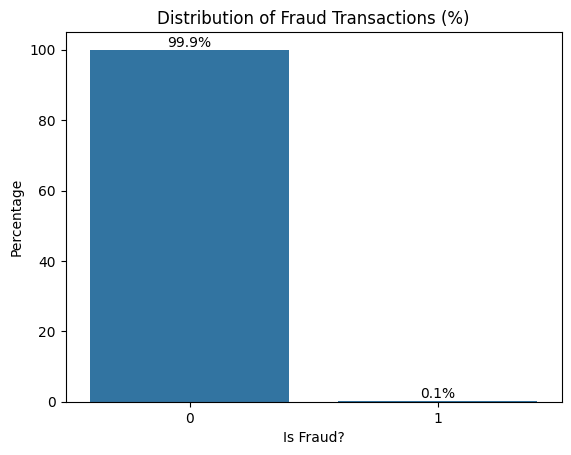

In [ ]:
# plot percentage of fraud transactions
fraud_counts = df.to_pandas()["Is Fraud?"].value_counts(normalize=True) * 100

print("Percentage of transactions by fraud status:")
print(fraud_counts)

ax = sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title("Distribution of Fraud Transactions (%)")
plt.ylabel("Percentage")
plt.xlabel("Is Fraud?")
plt.ylim(0, 105)

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height() + 1,
        f"{p.get_height():.1f}%",
        ha='center'
    )

plt.show()          # severe class imbalance

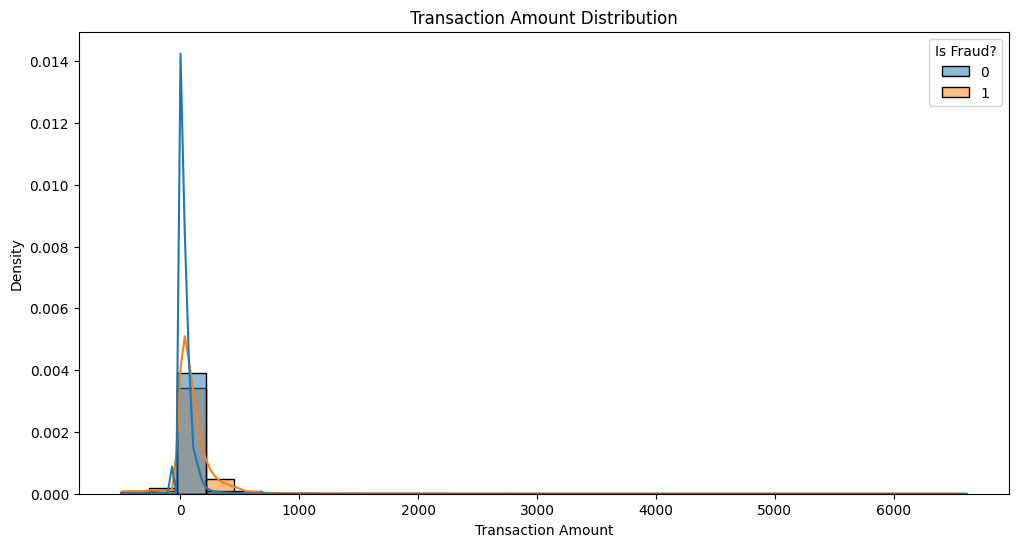

Is Fraud?
0     43.561998
1    106.095315
Name: Amount, dtype: float64

In [4]:
# plot distribution of transaction amount by fraud status
df_amt = df.select([
    "Amount",
    "Is Fraud?"
]).to_pandas()

# plot distribution 
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_amt, 
    x="Amount", 
    hue="Is Fraud?", 
    bins=30, 
    kde=True, 
    stat="density", 
    common_norm=False
)
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.show()      # amounts are highly right-skewed

# average transactions amount by fraud status
df_amt.groupby("Is Fraud?")["Amount"].mean()

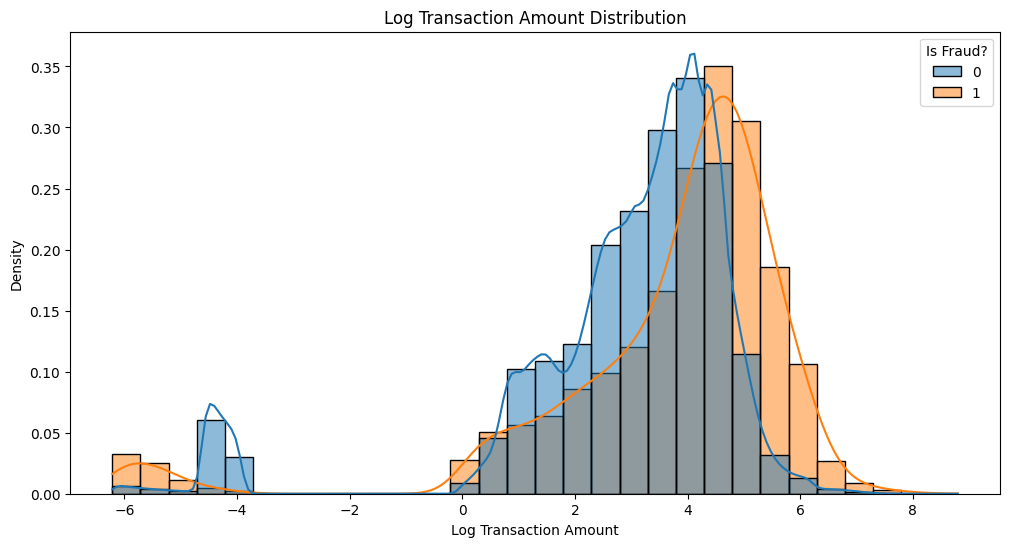

Is Fraud?
0    2.923898
1    3.652573
Name: amount_log, dtype: float64

In [ ]:
# plot distribution of log transaction amount by fraud status
df_log_amt = df.select([
    "amount_log",
    "Is Fraud?"
]).to_pandas()

# plot distribution 
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_log_amt, 
    x="amount_log", 
    hue="Is Fraud?", 
    bins=30, 
    kde=True, 
    stat="density", 
    common_norm=False
)
plt.title("Log Transaction Amount Distribution")
plt.xlabel("Log Transaction Amount")
plt.ylabel("Density")
plt.show()      # fraud transactions tend to be of higher value, regardless of whether it is a refund

# average log transactions amount by fraud status
df_log_amt.groupby("Is Fraud?")["amount_log"].mean()

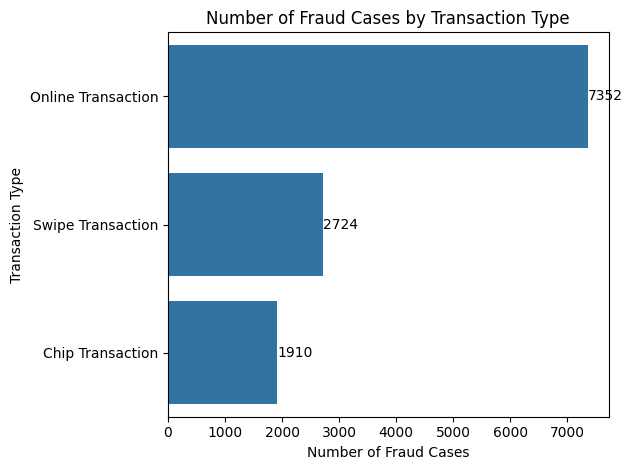

In [20]:
# plot number of fraud cases by transaction type
fraud_by_txn_type = (
    df.filter(pl.col("Is Fraud?") == 1)
      .group_by("Use Chip")
      .agg(pl.len().alias("Fraud_Count"))
      .sort("Fraud_Count", descending=True)
      .head(15)
      .to_pandas()
)

ax = sns.barplot(x="Fraud_Count", y="Use Chip", data=fraud_by_txn_type)
for p in ax.patches:
  width = p.get_width()
  ax.text(
      x=width + 1,
      y=p.get_y() + p.get_height()/2,
      s=int(width),
      ha='left',
      va='center'
  )
plt.title("Number of Fraud Cases by Transaction Type")
plt.ylabel("Transaction Type")
plt.xlabel("Number of Fraud Cases")
plt.tight_layout()
plt.show()    # majority of fraud cases are online transactions

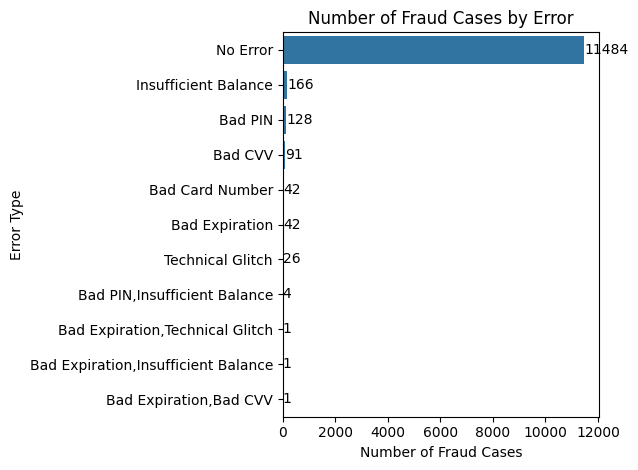

In [22]:
# plot number of fraud cases by errors
fraud_by_error = (
    df.filter(pl.col("Is Fraud?") == 1)
      .group_by("Errors?")
      .agg(pl.len().alias("Fraud_Count"))
      .sort("Fraud_Count", descending=True)
      .head(15)
      .to_pandas()
)

ax = sns.barplot(x="Fraud_Count", y="Errors?", data=fraud_by_error)
for p in ax.patches:
  width = p.get_width()
  ax.text(
      x=width + 1,
      y=p.get_y() + p.get_height()/2,
      s=int(width),
      ha='left',
      va='center'
  )
plt.title("Number of Fraud Cases by Error")
plt.ylabel("Error Type")
plt.xlabel("Number of Fraud Cases")
plt.tight_layout()
plt.show()

### Card Analysis

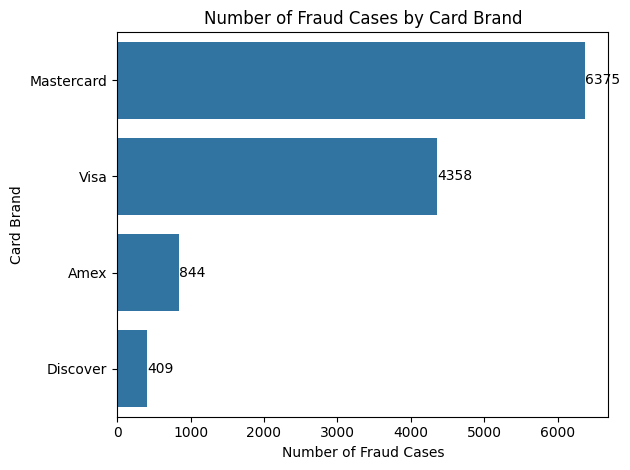

In [83]:
# plot number of fraud cases by card brand
fraud_by_brand = (
    df.filter(pl.col("Is Fraud?") == 1)
      .group_by("Card Brand")
      .agg(pl.len().alias("brand_count"))
      .sort("brand_count", descending=True)
      .head(15)
      .to_pandas()
)

ax = sns.barplot(x="brand_count", y="Card Brand", data=fraud_by_brand, orient="h")
for p in ax.patches:
  width = p.get_width()
  ax.text(
      x=width + 1,
      y=p.get_y() + p.get_height()/2,
      s=int(width),
      ha='left',
      va='center'
  )
plt.title("Number of Fraud Cases by Card Brand")
plt.ylabel("Card Brand")
plt.xlabel("Number of Fraud Cases")
plt.tight_layout()
plt.show()      # highest number of fraud cases with Mastercard

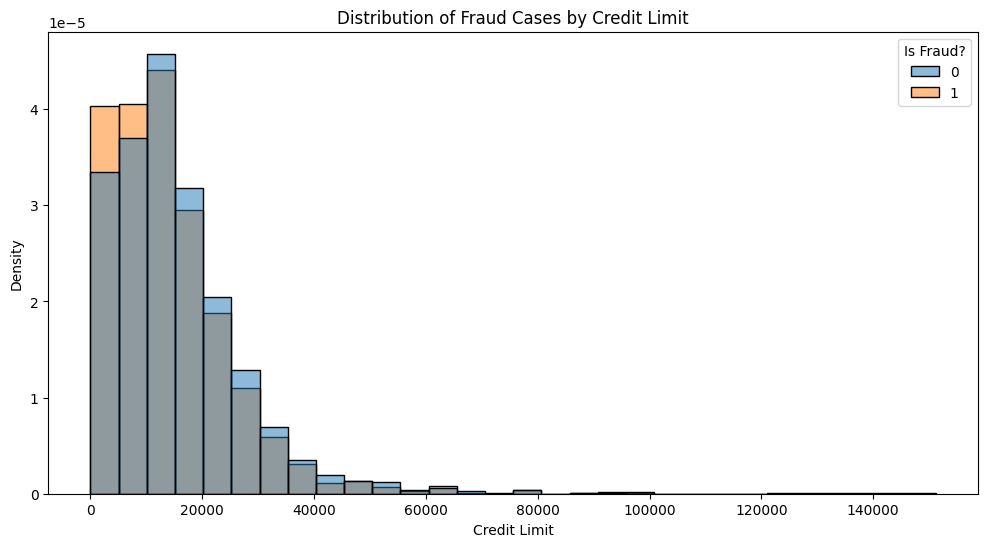

Is Fraud?
0    15250.697533
1    14047.945948
Name: Credit Limit, dtype: float64

In [10]:
# plot distribution of card credit limit by fraud status
df_credit_limit = df.select([
    "Credit Limit",
    "Is Fraud?"
]).to_pandas()

# plot distribution 
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_credit_limit, 
    x="Credit Limit", 
    hue="Is Fraud?", 
    bins=30, 
    kde=False, 
    stat="density", 
    common_norm=False
)
plt.title("Distribution of Fraud Cases by Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Density")
plt.show()      # fraudulent users tend to have a slightly lower credit limit

# average credit limit by fraud status
df_credit_limit.groupby("Is Fraud?")["Credit Limit"].mean()

### Merchant Analysis

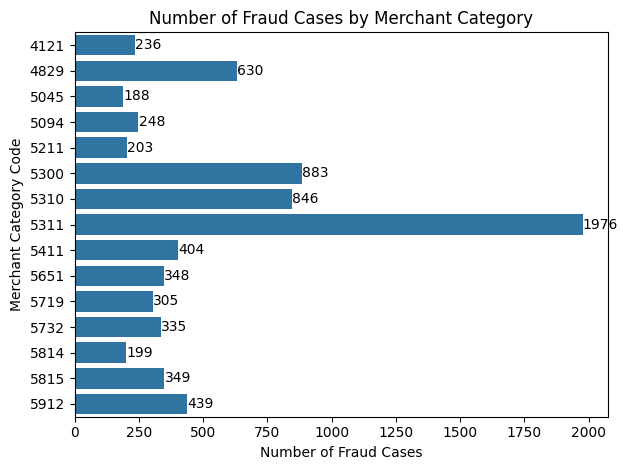

In [23]:
# plot number of fraud cases by merchant category
fraud_by_mcc = (
    df.filter(pl.col("Is Fraud?") == 1)
      .group_by("MCC")
      .agg(pl.len().alias("Fraud_Count"))
      .sort("Fraud_Count", descending=True)
      .head(15)
      .to_pandas()
)

ax = sns.barplot(x="Fraud_Count", y="MCC", data=fraud_by_mcc, orient="h")
for p in ax.patches:
  width = p.get_width()
  ax.text(
      x=width + 1,
      y=p.get_y() + p.get_height()/2,
      s=int(width),
      ha='left',
      va='center'
  )
plt.title("Number of Fraud Cases by Merchant Category")
plt.ylabel("Merchant Category Code")
plt.xlabel("Number of Fraud Cases")
plt.tight_layout()
plt.show()      # highest number of fraud cases in department stores (5311)

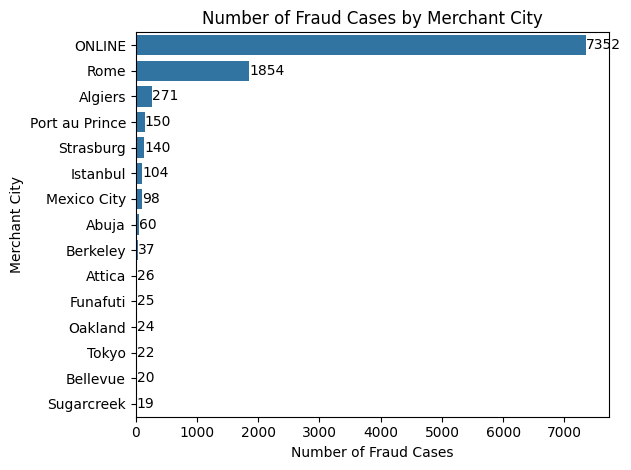

In [66]:
# plot number of fraud cases by merchant city
fraud_by_city = (
    df.filter(pl.col("Is Fraud?") == 1)
      .group_by("Merchant City")
      .agg(pl.len().alias("Fraud_Count"))
      .sort("Fraud_Count", descending=True)
      .head(15)
      .to_pandas()
)

ax = sns.barplot(x="Fraud_Count", y="Merchant City", data=fraud_by_city)
for p in ax.patches:
  width = p.get_width()
  ax.text(
      x=width + 1,
      y=p.get_y() + p.get_height()/2,
      s=int(width),
      ha='left',
      va='center'
  )
plt.title("Number of Fraud Cases by Merchant City")
plt.ylabel("Merchant City")
plt.xlabel("Number of Fraud Cases")
plt.tight_layout()
plt.show()      # besides online merchants, majority of fraud are outside of US

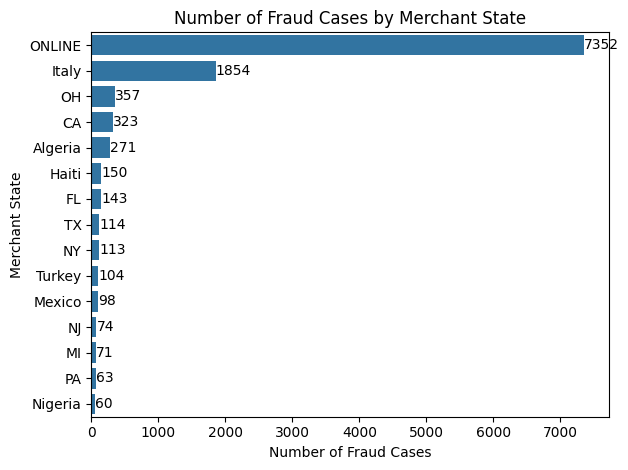

In [67]:
# plot number of fraud cases by merchant state
fraud_by_state = (
    df.filter(pl.col("Is Fraud?") == 1)
      .group_by("Merchant State")
      .agg(pl.len().alias("Fraud_Count"))
      .sort("Fraud_Count", descending=True)
      .head(15)
      .to_pandas()
)

ax = sns.barplot(x="Fraud_Count", y="Merchant State", data=fraud_by_state)
for p in ax.patches:
  width = p.get_width()
  ax.text(
      x=width + 1,
      y=p.get_y() + p.get_height()/2,
      s=int(width),
      ha='left',
      va='center'
  )
plt.title("Number of Fraud Cases by Merchant State")
plt.ylabel("Merchant State")
plt.xlabel("Number of Fraud Cases")
plt.tight_layout()
plt.show()    

In [60]:
# to see if there are any geographical patterns
# us states
us_states = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS",
    "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY",
    "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV",
    "WI", "WY", "DC"
]

# aggregate fraud counts by state
fraud_by_state = (
    df.filter(pl.col("Merchant State").is_in(us_states))
      .filter(pl.col("Is Fraud?") == 1)
      .group_by("Merchant State")
      .agg(pl.len().alias("Fraud_Count"))
      .sort("Fraud_Count", descending=True)
      .to_pandas()
)

# plot choropleth map
fig = px.choropleth(
    fraud_by_state,
    locations="Merchant State",
    locationmode="USA-states",
    color="Fraud_Count",
    scope="usa",
    title="Fraud Cases by U.S. State",
    labels={"Fraud_Count": "Number of Fraud Cases"}
)

for i, row in fraud_by_state.iterrows():
    fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        locations=[row["Merchant State"]],
        text=f"{row['Merchant State']}<br>{row['Fraud_Count']}",
        mode='text',
        textfont=dict(color="black", size=7, family="Arial"),
        showlegend=False
    ))

fig.update_layout(
    geo=dict(
        scope="usa",
        projection=go.layout.geo.Projection(type="albers usa"),
        showlakes=True,
        lakecolor="rgb(255, 255, 255)"
    ),
    title_x=0.3, 
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
)

fig.show()


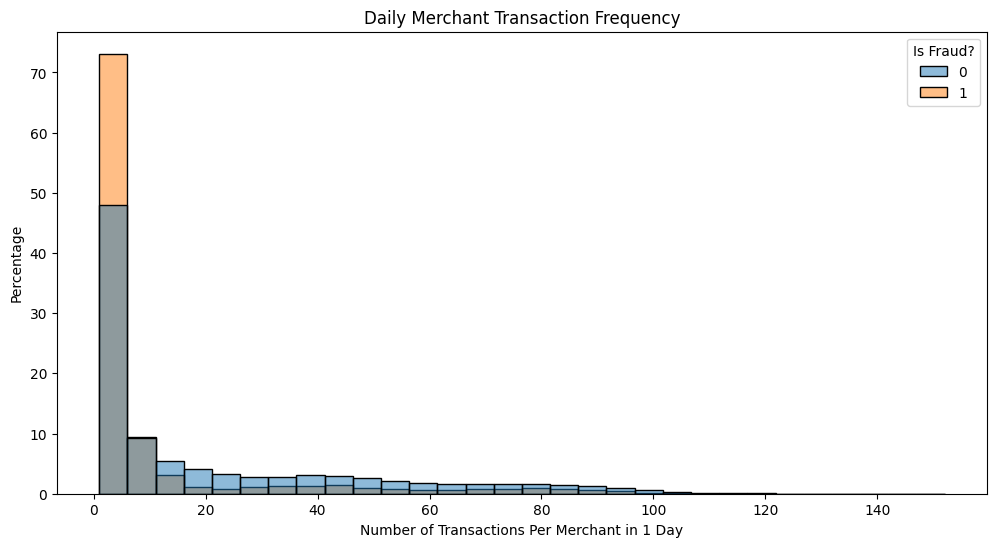

Is Fraud?
0    21.247958
1    10.293509
Name: Merchant_Freq_Day, dtype: float64

In [77]:
# get frequency of merchant transactions in 1 day
df_daily_freq = df.with_columns([
    (pl.col("Merchant Name").cast(pl.Utf8) + "_" + 
     pl.col("Date").cast(pl.Utf8)).alias("Merchant_Date")
])

df_daily_freq = df_daily_freq.with_columns([
    pl.col("Merchant_Date").count().over("Merchant_Date").alias("Merchant_Freq_Day")
])

merchant_daily_freq = df_daily_freq.select([
    "Merchant_Freq_Day", "Is Fraud?"
]).to_pandas()

# plot distribution
plt.figure(figsize=(12, 6))
sns.histplot(
    data=merchant_daily_freq,
    x="Merchant_Freq_Day",
    hue="Is Fraud?",
    bins=30,
    kde=False,  
    stat="percent",
    common_norm=False
)
plt.title("Daily Merchant Transaction Frequency")
plt.xlabel("Number of Transactions Per Merchant in 1 Day")
plt.ylabel("Percentage")
plt.show()

# average daily user transactions
merchant_daily_freq.groupby("Is Fraud?")["Merchant_Freq_Day"].mean()

### User Analysis

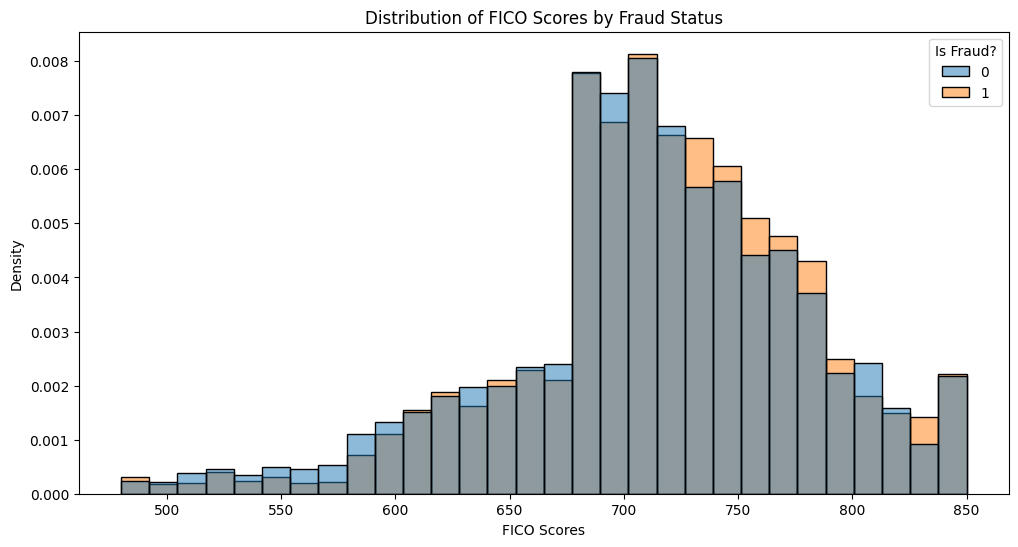

Is Fraud?
0    712.394516
1    717.522359
Name: FICO Score, dtype: float64

In [97]:
# plot distribution of FICO score by fraud status
df_fico = df.select([
    "FICO Score",
    "Is Fraud?"
]).to_pandas()

# plot distribution 
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_fico, 
    x="FICO Score", 
    hue="Is Fraud?", 
    bins=30, 
    kde=False, 
    stat="density", 
    common_norm=False
)
plt.title("Distribution of FICO Scores by Fraud Status")
plt.xlabel("FICO Scores")
plt.ylabel("Density")
plt.show()     

# average FICO score by fraud status
df_fico.groupby("Is Fraud?")["FICO Score"].mean()

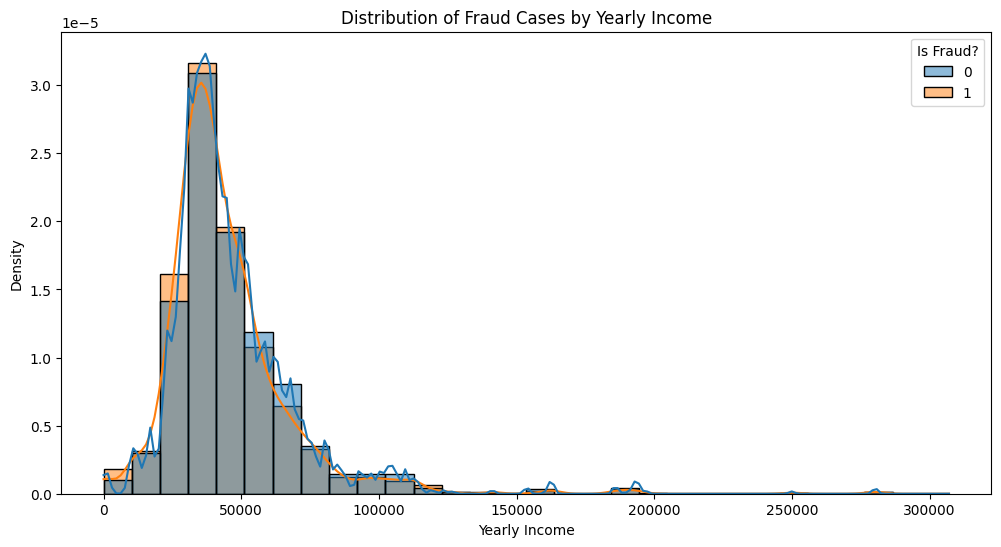

Is Fraud?
0    46605.020295
1    44608.218159
Name: Yearly Income - Person, dtype: float64

In [12]:
# plot distribution of users' yearly income by fraud status
df_income = df.select([
    "Yearly Income - Person",
    "Is Fraud?"
]).to_pandas()

# plot distribution 
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_income, 
    x="Yearly Income - Person", 
    hue="Is Fraud?", 
    bins=30, 
    kde=True, 
    stat="density", 
    common_norm=False
)
plt.title("Distribution of Fraud Cases by Yearly Income")
plt.xlabel("Yearly Income")
plt.ylabel("Density")
plt.show()      

# average yearly income by fraud status
df_income.groupby("Is Fraud?")["Yearly Income - Person"].mean()

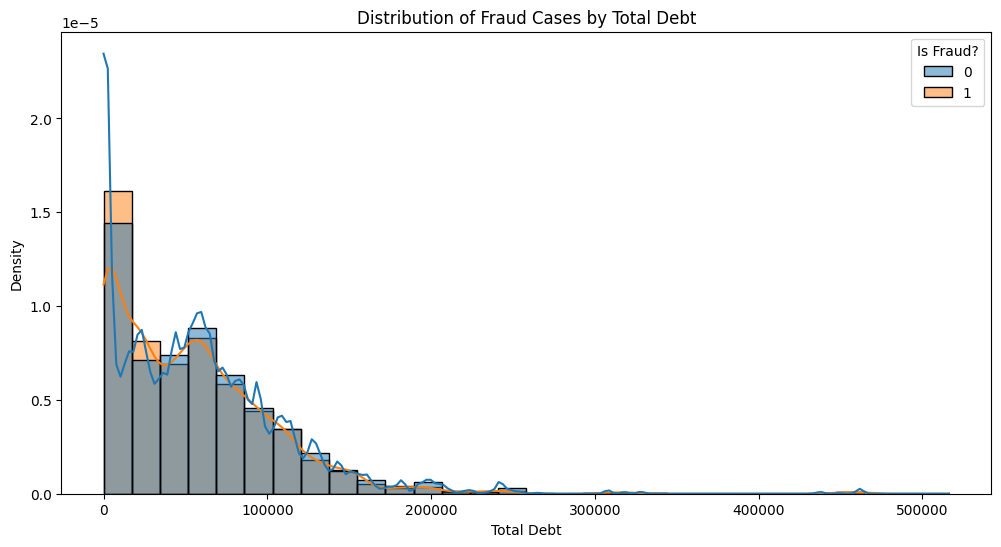

Is Fraud?
0    58519.254430
1    53744.196691
Name: Total Debt, dtype: float64

In [13]:
# plot distribution of users' total debt by fraud status
df_debt = df.select([
    "Total Debt",
    "Is Fraud?"
]).to_pandas()

# plot distribution 
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_debt, 
    x="Total Debt", 
    hue="Is Fraud?", 
    bins=30, 
    kde=True, 
    stat="density", 
    common_norm=False
)
plt.title("Distribution of Fraud Cases by Total Debt")
plt.xlabel("Total Debt")
plt.ylabel("Density")
plt.show()      

# average debt amount by fraud status
df_debt.groupby("Is Fraud?")["Total Debt"].mean()

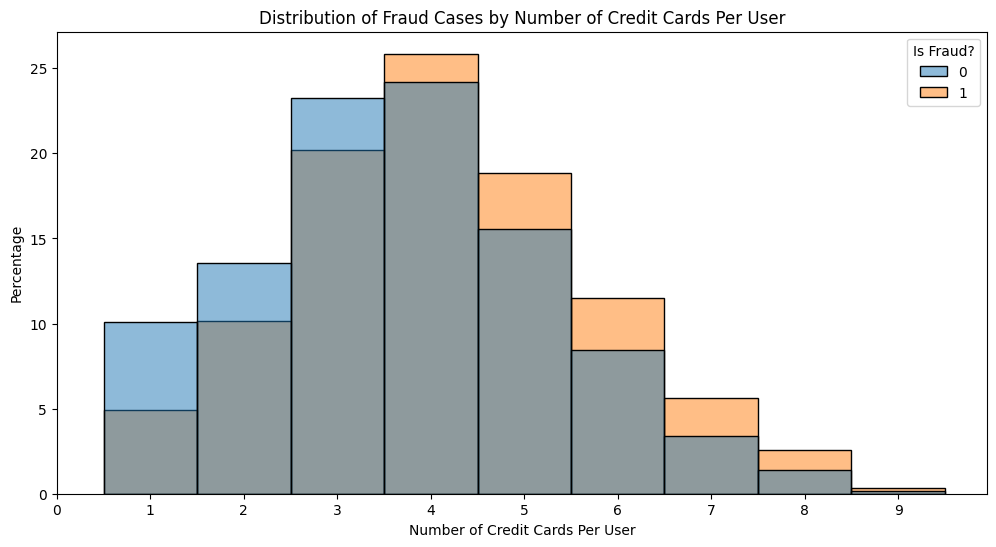

Is Fraud?
0    3.683290
1    4.155264
Name: Num Credit Cards, dtype: float64

In [103]:
# get distribution of fraud cases by number of credit cards per user
df_num_cards = df.select([
    "Num Credit Cards",
    "Is Fraud?"
]).to_pandas()

# plot distribution 
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_num_cards, 
    x="Num Credit Cards", 
    hue="Is Fraud?", 
    bins=30, 
    kde=False, 
    stat="percent", 
    common_norm=False, 
    discrete=True
)
plt.title("Distribution of Fraud Cases by Number of Credit Cards Per User")
plt.xlabel("Number of Credit Cards Per User")
plt.ylabel("Percentage")
max_val = int(df_num_cards["Num Credit Cards"].max())
plt.xticks(np.arange(0, max_val + 1, 1))
plt.show()      # users who own cards used for fraud tend to have more credit cards

# average number of credit cards by fraud status
df_num_cards.groupby("Is Fraud?")["Num Credit Cards"].mean()

### Behaviour Analysis

Percentage of different state transactions by fraud status:
   Is Fraud?  merchant_state_diff  Percentage
0          0                    0   80.056939
1          0                    1   19.943061
2          1                    1   87.218421
3          1                    0   12.781579


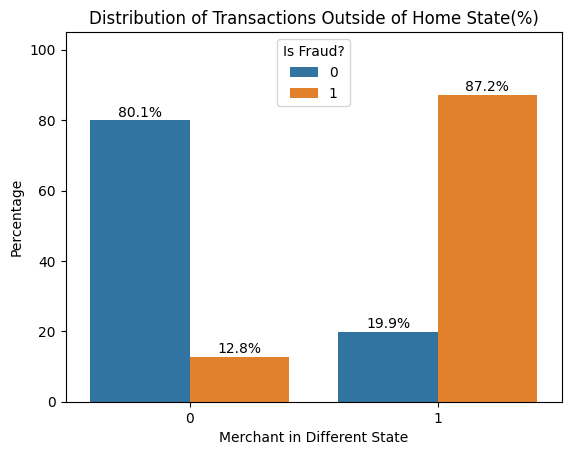

In [27]:
# plot distribution of merchant_state_diff by fraud status
state_diff_df = df.select([
    "merchant_state_diff",
    "Is Fraud?"
]).to_pandas()

state_diff_pct = (
  state_diff_df.groupby("Is Fraud?")["merchant_state_diff"]
                   .value_counts(normalize=True)
                   .mul(100)
                   .rename("Percentage")
                   .reset_index()
)

print("Percentage of different state transactions by fraud status:")
print(state_diff_pct)

ax = sns.barplot(
    data=state_diff_pct,
    x="merchant_state_diff", 
    y="Percentage", 
    hue="Is Fraud?",
    dodge=True)

plt.title("Distribution of Transactions Outside of Home State(%)")
plt.ylabel("Percentage")
plt.xlabel("Merchant in Different State")
plt.ylim(0, 105)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.text(
          p.get_x() + p.get_width()/2,
          p.get_height() + 1,
          f"{p.get_height():.1f}%",
          ha='center'
      )

plt.show()      # 87.2% of fraud cases happen when user state != merchant state

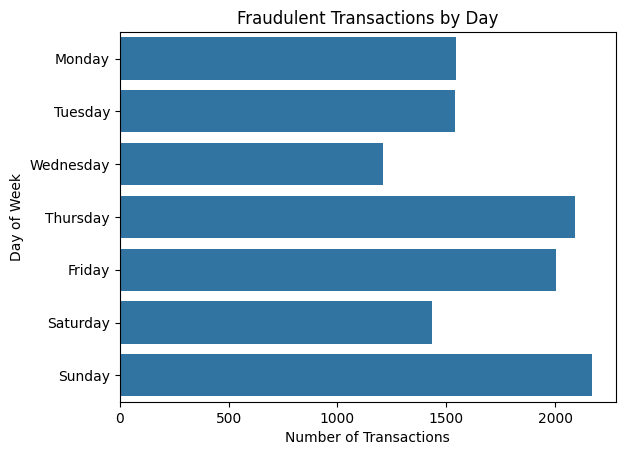

In [32]:
# get day of week
df_day = df.with_columns([
    pl.col("DateTime").str.strptime(pl.Datetime, strict=False).alias("DateTime")
])
df_day = df_day.with_columns([
    pl.col("DateTime").dt.weekday().alias("DayOfWeek")
])

# plot fraudulent transactions by day of week
fraud_by_day = (
    df_day.group_by(["DayOfWeek", "Is Fraud?"])
          .agg(pl.len().alias("Count"))
          .sort("DayOfWeek")
          .filter(pl.col("Is Fraud?") == 1)
          .to_pandas()
)

# map day numbers to names
day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
             5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
fraud_by_day['DayName'] = fraud_by_day['DayOfWeek'].map(day_names)

sns.barplot(x="Count", y="DayName", data=fraud_by_day)
plt.title("Fraudulent Transactions by Day")
plt.xlabel("Number of Transactions")
plt.ylabel("Day of Week")
plt.show()      # fraud tends to occur on Sundays, followed by Thursdays and Fridays

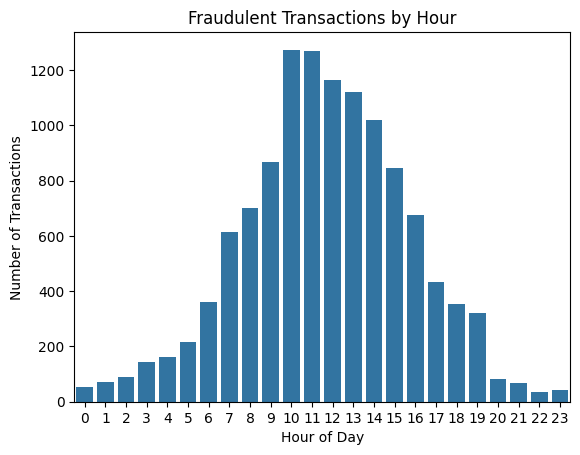

In [33]:
# plot fraudulent transactions by hour
fraud_by_hour = (
    df.group_by(["Hour", "Is Fraud?"])
      .agg(pl.len().alias("Count"))
      .sort("Hour")
      .filter(pl.col("Is Fraud?") == 1)
      .to_pandas()
)

sns.barplot(x="Hour", y="Count", data=fraud_by_hour)
plt.title("Fraudulent Transactions by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.show()      # most fraud transactions occur during the day
                # only a low proportion occurs during abnormal hours

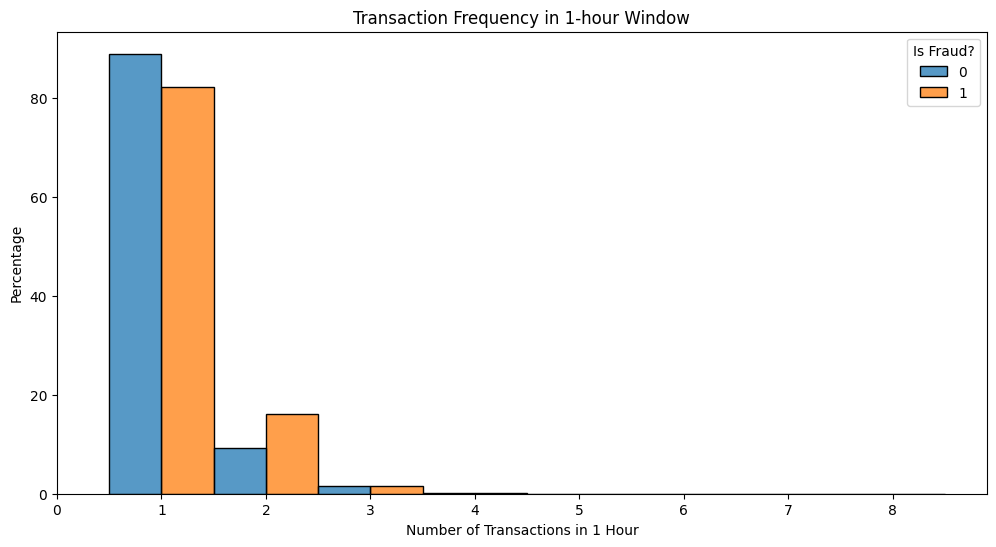

Is Fraud?
0    1.130916
1    1.197527
Name: txn_count_1h, dtype: float64

In [82]:
# get frequency of user transactions in 1 hour window
df_user_sorted = df.with_columns(
    pl.col("DateTime").str.strptime(pl.Datetime, strict=False)
).sort(["User_card", "DateTime"])

df_rolled = (
    df_user_sorted.rolling(index_column="DateTime", period="1h", group_by="User_card")
                  .agg([pl.len().alias("txn_count_1h")])
)

# join back to df
df_rolled = df_user_sorted.join(
    df_rolled,
    on=["User_card", "DateTime"],
    how="left"
).with_columns(
    pl.col("txn_count_1h").fill_null(0).cast(pl.Int64)
)

df_freq = df_rolled.select([
    "txn_count_1h",
    "Is Fraud?"
]).to_pandas()

# plot distribution 
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_freq, 
    x="txn_count_1h", 
    hue="Is Fraud?", 
    bins=30, 
    kde=False, 
    stat="percent", 
    common_norm=False, 
    discrete=True,
    multiple="dodge"
)
plt.title("Transaction Frequency in 1-hour Window")
plt.xlabel("Number of Transactions in 1 Hour")
plt.ylabel("Percentage")
max_val = int(df_freq["txn_count_1h"].max())
plt.xticks(np.arange(0, max_val + 1, 1))
plt.show()

# average transactions per hour by fraud status
df_freq.groupby("Is Fraud?")["txn_count_1h"].mean()

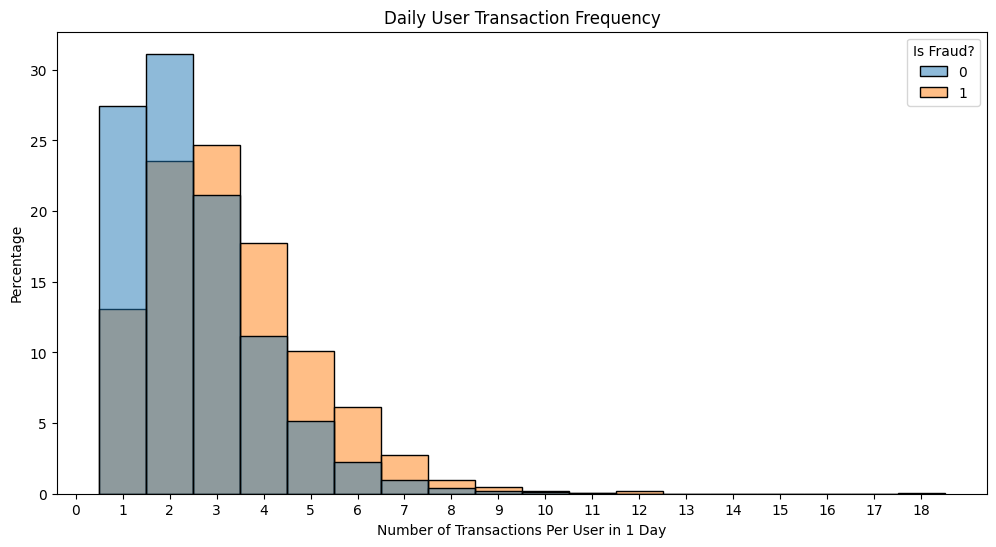

Is Fraud?
0    2.506969
1    3.291757
Name: User_Freq_Day, dtype: float64

In [74]:
# get frequency of user transactions in 1 day
df_daily_freq = df.with_columns([
    (pl.col("User").cast(pl.Utf8) + "_" + 
     pl.col("Date").cast(pl.Utf8)).alias("User_Date")
])

df_daily_freq = df_daily_freq.with_columns([
    pl.col("User_Date").count().over("User_Date").alias("User_Freq_Day")
])

user_daily_freq = df_daily_freq.select([
    "User_Freq_Day", "Is Fraud?"
]).to_pandas()

# plot distribution
plt.figure(figsize=(12, 6))
sns.histplot(
    data=user_daily_freq,
    x="User_Freq_Day",
    hue="Is Fraud?",
    kde=False,  
    stat="percent",
    common_norm=False,
    discrete=True
)
plt.title("Daily User Transaction Frequency")
plt.xlabel("Number of Transactions Per User in 1 Day")
plt.ylabel("Percentage")
max_val = int(user_daily_freq["User_Freq_Day"].max())
plt.xticks(np.arange(0, max_val + 1, 1))
plt.show()

# average daily user transactions
user_daily_freq.groupby("Is Fraud?")["User_Freq_Day"].mean()

### Fraud Network Analysis

#### Merchant Risk Network

**Merchant-to-Merchant network with common high-fraud users**

To identify merchants that are vulnerable to fraud 

<br>

Nodes: Merchants invovled in fraudulent activity
* linked to users with multiple fraud transactions

Edges: Fraud links between merchants
* merchants are connected if high-fraud users performed fraud at both merchants
* loops: user committed multiple fraud transactions at the same merchant

Edge Width: Number of shared fraudsters between merchants
* thicker edge = there are more high-fraud users that hit both merchants

Node Colour: Merchant risk score (in terms of financial loss)
* darker colour = higher-value fraud transactions

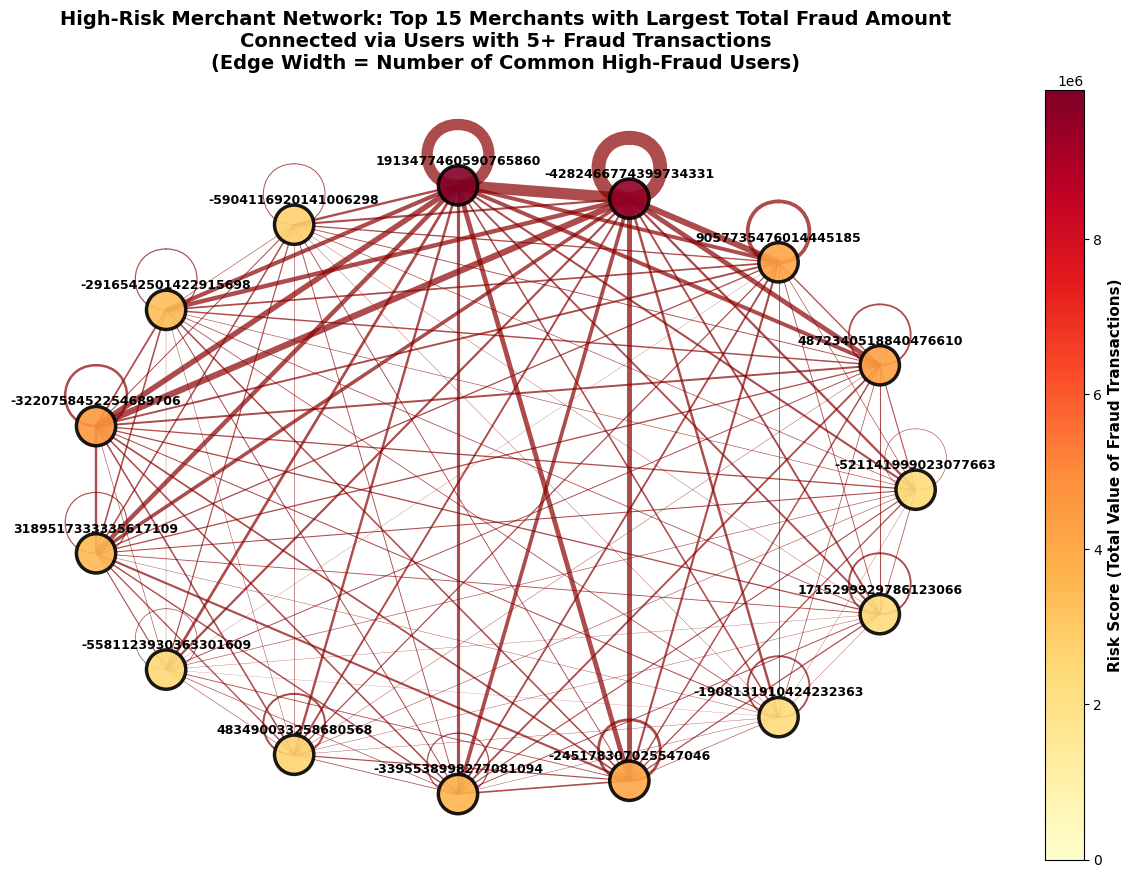

In [72]:
# identify high-fraud users 
high_fraud_users = (
    df.filter(pl.col("Is Fraud?") == 1)
      .group_by("User")
      .agg(pl.len().alias("fraud_count"))
      .filter(pl.col("fraud_count") >= 5)  # get users with 5+ fraud transactions
      .select("User")
      .to_series()
      .to_list()
)

fraud_subset = (
    df.filter(
        (pl.col("User").is_in(high_fraud_users)) & 
        (pl.col("Is Fraud?") == 1)
    )
    .select(["User", "Merchant Name", "Amount"])
    .to_pandas()
)

# create merchant-to-merchant connections via shared fraudsters
merchant_pairs = []
for user in high_fraud_users:
    user_merchants = fraud_subset[fraud_subset['User'] == user]['Merchant Name'].tolist()
    user_amounts = fraud_subset[fraud_subset['User'] == user]['Amount'].sum()
    
    for i in range(len(user_merchants)):
        for j in range(i+1, len(user_merchants)):
            merchant_pairs.append({
                'Merchant1': user_merchants[i],
                'Merchant2': user_merchants[j],
                'Shared_User': user,
                'Risk_Score': user_amounts
            })

if merchant_pairs:
    pairs_df = pd.DataFrame(merchant_pairs)
    
    # get total fraud amount and number of shared users between merchants
    pairs_agg = pairs_df.groupby(['Merchant1', 'Merchant2']).agg({
        'Risk_Score': 'sum',
        'Shared_User': 'count'
    }).reset_index()
    pairs_agg.columns = ['Merchant1', 'Merchant2', 'Total_Risk', 'Shared_Users']
    
    G = nx.from_pandas_edgelist(
        pairs_agg, 'Merchant1', 'Merchant2',
        edge_attr=['Total_Risk', 'Shared_Users']
    )
    
    if len(G.nodes()) > 0:

        # === MAIN NETWORK PLOT ===
        fig, ax = plt.subplots(figsize=(14, 10))
        
        # node color by financial risk
        node_risks = {}
        for node in G.nodes():
            total_risk = sum([G[node][neighbor]['Total_Risk'] for neighbor in G.neighbors(node)])
            node_risks[node] = total_risk

        # keep top 15 merchants with largest total fraud amounts
        top_nodes = sorted(node_risks.items(), key=lambda x: x[1], reverse=True)[:15]
        top_node_names = [node for node, _ in top_nodes]

        G = G.subgraph(top_node_names).copy()
        
        max_risk = max(node_risks.values()) if node_risks else 1
        node_colors_vals = [node_risks[node] / max_risk for node in G.nodes()]

        # node size by degree
        node_sizes = [50 * G.degree(node) for node in G.nodes()]
        
        # draw nodes
        pos = nx.kamada_kawai_layout(G)
        nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                                      node_color=node_colors_vals,
                                      cmap=plt.cm.YlOrRd, vmin=0, vmax=1,
                                      alpha=0.9, edgecolors='black', linewidths=2.5,
                                      ax=ax)
        
        # edge width by number of shared users
        shared_users = [G[u][v]['Shared_Users'] for u, v in G.edges()]
        max_shared = max(shared_users) if shared_users else 1
        edge_widths = [10 * (su / max_shared) for su in shared_users]
        
        nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.7, 
                              edge_color='darkred', ax=ax)
        
        # labels merchants
        label_pos = {k: (v[0], v[1] + 0.08) for k, v in pos.items()}  
        nx.draw_networkx_labels(G, label_pos, font_size=9, font_weight='bold', ax=ax)
        
        # add colorbar
        sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, 
                                   norm=plt.Normalize(vmin=0, vmax=max_risk))
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
        cbar.set_label('Risk Score (Total Value of Fraud Transactions)', fontweight='bold', fontsize=11)
        
        ax.set_title(f"High-Risk Merchant Network: Top 15 Merchants with Largest Total Fraud Amount\nConnected via Users with 5+ Fraud Transactions\n(Edge Width = Number of Common High-Fraud Users)", 
                     fontsize=14, fontweight='bold', pad=15)
        ax.axis('off')
        plt.show()

    else:
        print("No significant merchant network detected with current threshold.")
else:
    print("No merchant pairs found with current criteria.")

In [73]:
# create ranking dataframe
risk_ranking = []
for node in G.nodes():
    risk_ranking.append({
        'Merchant': str(node),
        'Risk Score': node_risks[node],
        'Connections': G.degree(node),
        'Total Fraudsters': sum([G[node][neighbor]['Shared_Users'] 
                                for neighbor in G.neighbors(node)])
    })

rank_df = pd.DataFrame(risk_ranking).sort_values('Risk Score', ascending=False)
rank_df['Rank'] = range(1, len(rank_df) + 1)
rank_df = rank_df[['Rank', 'Merchant', 'Risk Score', 'Connections', 'Total Fraudsters']]

# print summary
print("\n" + "="*60)
print("HIGH-RISK MERCHANT NETWORK ANALYSIS")
print("="*60)
print(f"Total high-fraud users analyzed: {len(high_fraud_users)}")
print(f"High-risk merchants in network: {len(G.nodes())}")
print(f"Merchant connections: {len(G.edges())}")
print(f"\nTop 5 highest-risk merchants:")
for idx, row in rank_df.head().iterrows():
    print(f"  {int(row['Rank'])}. {row['Merchant'][:30]}")
    print(f"     Risk: {row['Risk Score']:.2f} | Connections: {int(row['Connections'])} | Fraudsters: {int(row['Total Fraudsters'])}")
print("="*60)


HIGH-RISK MERCHANT NETWORK ANALYSIS
Total high-fraud users analyzed: 887
High-risk merchants in network: 15
Merchant connections: 120

Top 5 highest-risk merchants:
  1. 1913477460590765860
     Risk: 9927625.68 | Connections: 16 | Fraudsters: 1165
  2. -4282466774399734331
     Risk: 9563125.77 | Connections: 16 | Fraudsters: 1281
  3. -3220758452254689706
     Risk: 4618679.12 | Connections: 16 | Fraudsters: 579
  4. 4872340518840476610
     Risk: 4309823.68 | Connections: 16 | Fraudsters: 445
  5. 9057735476014445185
     Risk: 4213793.64 | Connections: 16 | Fraudsters: 519


In [74]:
row = df.filter(pl.col("Merchant Name") == 1913477460590765860)
row = row.to_pandas()
print(row)

print("\n=== Type of Transaction ===\n")                  
print(row["Use Chip"].unique())

print("\n=== Number of Fraudulent Transactions ===\n")                           # 0.28% of all transactions are fraudulent
print(row["Is Fraud?"].value_counts())

print("\n=== Number of Fraudulent Transactions per Transaction Type===\n")       # 95.2% of fraud are online
fraud_txns = row[row["Is Fraud?"] == 1]
print(fraud_txns["Use Chip"].value_counts())

print("\n=== Fraud Count by State===\n")                                         # besides slightly more frequent fraud in California, 
fraud_by_state = (                                                               # in-person fraud seems to be spread out across states
    row.groupby("Merchant State")["Is Fraud?"]
       .sum()
       .reset_index(name="fraud_count")
       .query("fraud_count > 0")
       .sort_values("fraud_count", ascending=False)
)
print(fraud_by_state)

        User  Card  Year  Month  Day  Amount           Use Chip  \
0        136     2  2013      6   27   69.18  Swipe Transaction   
1       1150     0  2008      3   28  136.64  Swipe Transaction   
2       1781     0  2013      3   11   21.56  Swipe Transaction   
3       1964     3  2017      2    5  121.01   Chip Transaction   
4       1398     1  2006     12   19  119.71  Swipe Transaction   
...      ...   ...   ...    ...  ...     ...                ...   
224237  1710     2  2011      3    8   41.74  Swipe Transaction   
224238  1497     3  2018      3    4   34.73   Chip Transaction   
224239   854     3  2017      3   27   35.16   Chip Transaction   
224240  1511     0  2019      2   20   73.40  Swipe Transaction   
224241  1281     0  2012     11    6   11.16  Swipe Transaction   

              Merchant Name  Merchant City Merchant State  ...  \
0       1913477460590765860    Kansas City             KS  ...   
1       1913477460590765860  Santa Barbara             CA  ... 

In [17]:
row = df.filter(pl.col("Merchant Name") == -4282466774399734331)
row = row.to_pandas()
print(row)

print("\n=== Type of Transaction ===\n")                  
print(row["Use Chip"].unique())

print("\n=== Number of Fraudulent Transactions ===\n")                           # 0.1% of all transactions are fraudulent
print(row["Is Fraud?"].value_counts())

print("\n=== Number of Fraudulent Transactions per Transaction Type===\n")       # 93.1% of fraud are online
fraud_txns = row[row["Is Fraud?"] == 1]
print(fraud_txns["Use Chip"].value_counts())

print("\n=== Fraud Count by State===\n")                                         # in-person fraud seems to be spread out across states
fraud_by_state = (
    row.groupby("Merchant State")["Is Fraud?"]
       .sum()
       .reset_index(name="fraud_count")
       .query("fraud_count > 0")
       .sort_values("fraud_count", ascending=False)
)
print(fraud_by_state)

        User  Card  Year  Month  Day  Amount           Use Chip  \
0       1529     1  2003      6   12    80.0  Swipe Transaction   
1        903     0  2012      1    1    80.0  Swipe Transaction   
2       1716     2  2015     10   13   140.0  Swipe Transaction   
3       1693     3  2006      8   26    80.0  Swipe Transaction   
4        513     1  2001     12   10   140.0  Swipe Transaction   
...      ...   ...   ...    ...  ...     ...                ...   
451344  1794     0  2002      8   31    80.0  Swipe Transaction   
451345  1753     4  2007      4   10    40.0  Swipe Transaction   
451346   747     4  2009      2    1    40.0  Swipe Transaction   
451347   932     1  2017      5   13   120.0   Chip Transaction   
451348  1404     2  2018      9   13    20.0   Chip Transaction   

              Merchant Name    Merchant City Merchant State  ...  \
0      -4282466774399734331       Texas City             TX  ...   
1      -4282466774399734331      Los Angeles             CA

In [30]:
targets = [-4282466774399734331, 1913477460590765860]

fraud_two_merchants = (
    df.filter((pl.col("Is Fraud?") == 1) &
              (pl.col("Merchant Name").is_in(targets)))
)

# get users who committed fraud at both merchants
user_by_merchant = (
    fraud_two_merchants
    .group_by(["User", "Merchant Name"])
    .agg(pl.len().alias("fraud_count"))
)

intersection_users = (
    user_by_merchant
    .group_by("User")
    .agg([
        pl.col("Merchant Name").n_unique().alias("merchant_count"),
        pl.col("fraud_count").sum().alias("total_fraud")
    ])
    .filter(pl.col("merchant_count") == 2)  
)

users_intersection_list = intersection_users["User"].to_list()

fraud_details = (
    fraud_two_merchants
    .filter(pl.col("User").is_in(users_intersection_list))
    .sort(["User", "DateTime"])
)

fraud_details

User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,MCC,Errors?,Zip_str,DateTime,Date,Hour,User_card,State,FICO Score,Yearly Income - Person,Total Debt,Num Credit Cards,Card Brand,Credit Limit,Card on Dark Web,merchant_state_diff,amount_is_refund,amount_log,hour_angle,hour_sin,hour_cos,card_kappa,von_mises_likelihood_card,Is Fraud?
i64,i64,i64,i64,i64,f64,str,i64,str,str,i64,str,str,str,str,i64,str,str,i64,str,str,i64,str,str,str,i64,i64,f64,f64,f64,f64,f64,f64,i64
2,4,2013,10,11,98.85,"""Online Transaction""",-4282466774399734331,"""ONLINE""","""ONLINE""",4829,"""No Error""","""ONL""","""2013-10-11T06:55:00.000000""","""2013-10-11""",6,"""2_4""","""CA""",698,"""$33483""","""$196""",5,"""Mastercard""","""$16055""","""No""",1,0,4.603669,1.56876,0.999998,0.002036,0.437368,0.844699,1
2,4,2015,9,1,78.16,"""Online Transaction""",-4282466774399734331,"""ONLINE""","""ONLINE""",4829,"""No Error""","""ONL""","""2015-09-01T11:05:00.000000""","""2015-09-01""",11,"""2_4""","""CA""",698,"""$33483""","""$196""",5,"""Mastercard""","""$16055""","""No""",1,0,4.371471,-1.882919,-0.951684,-0.30708,0.437368,1.03832,1
2,4,2015,9,2,73.26,"""Online Transaction""",1913477460590765860,"""ONLINE""","""ONLINE""",5300,"""No Error""","""ONL""","""2015-09-02T13:40:00.000000""","""2015-09-02""",13,"""2_4""","""CA""",698,"""$33483""","""$196""",5,"""Mastercard""","""$16055""","""No""",1,0,4.307572,-1.355539,-0.976921,0.213599,0.437368,1.286331,1
16,1,2007,11,29,69.63,"""Online Transaction""",1913477460590765860,"""ONLINE""","""ONLINE""",5300,"""No Error""","""ONL""","""2007-11-29T09:27:00.000000""","""2007-11-29""",9,"""16_1""","""TX""",719,"""$36497""","""$38333""",6,"""Mastercard""","""$12332""","""No""",1,0,4.257455,2.362303,0.702774,-0.711413,0.437368,0.666315,1
16,0,2008,4,24,49.08,"""Online Transaction""",-4282466774399734331,"""ONLINE""","""ONLINE""",4829,"""No Error""","""ONL""","""2008-04-24T08:24:00.000000""","""2008-04-24""",8,"""16_0""","""TX""",719,"""$36497""","""$38333""",6,"""Mastercard""","""$14499""","""No""",1,0,3.913622,2.087414,0.869495,-0.493942,0.437368,0.707092,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1946,4,2013,12,20,122.67,"""Online Transaction""",-4282466774399734331,"""ONLINE""","""ONLINE""",4829,"""No Error""","""ONL""","""2013-12-20T12:45:00.000000""","""2013-12-20""",12,"""1946_4""","""CA""",683,"""$26696""","""$0""",5,"""Mastercard""","""$9513""","""No""",1,0,4.817617,-1.632756,-0.998081,-0.06192,0.437368,1.15524,1
1946,1,2015,10,19,252.22,"""Online Transaction""",1913477460590765860,"""ONLINE""","""ONLINE""",5300,"""No Error""","""ONL""","""2015-10-19T12:41:00.000000""","""2015-10-19""",12,"""1946_1""","""CA""",683,"""$26696""","""$0""",5,"""Mastercard""","""$5082""","""No""",1,0,5.534259,-1.631592,-0.998153,-0.060758,0.437368,1.155795,1
1996,3,2007,11,9,141.58,"""Online Transaction""",-4282466774399734331,"""ONLINE""","""ONLINE""",4829,"""Bad Card Number""","""ONL""","""2007-11-09T10:22:00.000000""","""2007-11-09""",10,"""1996_3""","""KY""",740,"""$49378""","""$104480""",4,"""Mastercard""","""$2468""","""No""",1,0,4.959903,-2.14501,-0.83962,-0.543174,0.437368,0.926276,1


In [45]:
row = df.filter(pl.col("Merchant Name") == -3220758452254689706)
row = row.to_pandas()
print(row)

print("\n=== Type of Transaction ===\n")                  
print(row["Use Chip"].unique())

print("\n=== Number of Fraudulent Transactions ===\n")                           # 0.55% of all transactions are fraudulent
print(row["Is Fraud?"].value_counts())

print("\n=== Number of Fraudulent Transactions per Transaction Type===\n")       # 91.1% of fraud are online
fraud_txns = row[row["Is Fraud?"] == 1]
print(fraud_txns["Use Chip"].value_counts())

print("\n=== Fraud Count by State===\n")                                         # in-person fraud seems to be concentrated in California and spread out across other states
fraud_by_state = (
    row.groupby("Merchant State")["Is Fraud?"]
       .sum()
       .reset_index(name="fraud_count")
       .query("fraud_count > 0")
       .sort_values("fraud_count", ascending=False)
)
print(fraud_by_state)

       User  Card  Year  Month  Day  Amount           Use Chip  \
0      1309     2  2005      7    8   97.89  Swipe Transaction   
1       832     0  2017      8   29   67.27   Chip Transaction   
2      1682     0  2016     11   26   17.84   Chip Transaction   
3      1483     1  2017     11   10   44.40   Chip Transaction   
4      1989     1  2009      5    3   50.51  Swipe Transaction   
...     ...   ...   ...    ...  ...     ...                ...   
49134  1854     2  2016      8   14  232.02   Chip Transaction   
49135    47     4  2002      8   19   32.40  Swipe Transaction   
49136  1199     2  2014      4   15   57.14  Swipe Transaction   
49137  1823     2  2017      4   22   43.39   Chip Transaction   
49138  1625     3  2005     10   19  249.86  Swipe Transaction   

             Merchant Name     Merchant City Merchant State  ...  \
0     -3220758452254689706            Carmel             IN  ...   
1     -3220758452254689706  North Fort Myers             FL  ...   
2  

#### Fraud Ring Detection

**User-to-User network of users who committed fraud at the same merchants**

To detect potential fraud rings

In [81]:
fraud_txns = df.filter(pl.col("Is Fraud?") == 1).to_pandas()

# get users who share merchants (potential collusion)
merchant_users = fraud_txns.groupby('Merchant Name')['User'].apply(list).to_dict()

# create user-to-user network based on common merchants
user_connections = []
for merchant, users_list in merchant_users.items():
    if len(users_list) > 1:  # multiple users at same merchant
        for i in range(len(users_list)):
            for j in range(i+1, len(users_list)):
                user_connections.append({
                    'User1': users_list[i],
                    'User2': users_list[j],
                    'Shared_Merchant': merchant,
                    'Weight': 1
                })

if user_connections:
    edge_df = pd.DataFrame(user_connections)

    # aggregate weights based on number of common merchants
    edge_df = edge_df.groupby(['User1', 'User2']).agg({
        'Weight': 'sum',
        'Shared_Merchant': lambda x: list(x)
    }).reset_index()
    
    # filter for users sharing 5+ merchants (fraud at many common merchants is suspicious)
    edge_df = edge_df[edge_df['Weight'] >= 5]
    
    G = nx.from_pandas_edgelist(edge_df, 'User1', 'User2', edge_attr=['Weight', 'Shared_Merchant'])
    
    # remove isolated nodes
    G.remove_nodes_from(list(nx.isolates(G)))
    
    # only keep largest connected components
    if len(G.nodes()) > 0:
        components = sorted(nx.connected_components(G), key=len, reverse=True)
        nodes_to_keep = set()
        for comp in components[:3]:
            if len(comp) >= 3:  
                nodes_to_keep.update(comp)
        
        G = G.subgraph(nodes_to_keep).copy()
    
    if len(G.nodes()) > 0:
        # find communities (possible fraud rings)
        communities = list(nx.community.greedy_modularity_communities(G))

print("="*80)
print("FRAUD RING ANALYSIS")
print("="*80)
print(f"Total fraud rings detected: {len(communities)}")
print(f"Total users involved: {len(G.nodes())}")
print(f"Total connections: {len(G.edges())}")

for i, comm in enumerate(communities, 1):
    subgraph = G.subgraph(comm)
    users_list = list(comm)
    print(f"\nRing {i}:")
    print(f"  - Users: {len(comm)} (showing first few: {users_list[:10]})")
    print(f"  - Internal connections: {len(subgraph.edges())}")
    
    # get most shared merchants
    all_merchants = []
    for u, v in subgraph.edges():
        all_merchants.extend(G[u][v]['Shared_Merchant'])
    
    if all_merchants:
        top_merchants = Counter(all_merchants).most_common(3)
        print(f"  - Top shared merchants: {[m[0] for m in top_merchants]}")

    # transactions of users in this ring
    ring_txns = fraud_txns[fraud_txns['User'].isin(users_list)]

    # get home states of users in ring
    home_states = ring_txns.groupby('State')['User'].nunique().sort_values(ascending=False).head(10)
    print(f"  - Top User States:")
    for state, count in home_states.items():
        print(f"      {state}: {count} user(s)")

    # get merchant states of transactions in ring
    merchant_states = ring_txns['Merchant State'].value_counts().head(10)
    print(f"  - Top Merchant States:")
    for state, count in merchant_states.items():
        print(f"      {state}: {count} transactions(s)")
    
    # get commonly targeted MCC 
    common_mcc = ring_txns['MCC'].value_counts().head(10)
    print(f"  - Top MCC codes:")
    for mcc, count in common_mcc.items():
        print(f"      {mcc}: {count} transactions(s)")

print("="*80)

FRAUD RING ANALYSIS
Total fraud rings detected: 6
Total users involved: 861
Total connections: 18234

Ring 1:
  - Users: 382 (showing first few: [1024, 2, 1029, 1033, 1034, 1036, 13, 1038, 1040, 22])
  - Internal connections: 5969
  - Top shared merchants: [-4282466774399734331, 9057735476014445185, 1913477460590765860]
  - Top User States:
      CA: 47 user(s)
      NY: 27 user(s)
      FL: 26 user(s)
      TX: 25 user(s)
      NC: 20 user(s)
      IL: 17 user(s)
      PA: 13 user(s)
      TN: 12 user(s)
      GA: 12 user(s)
      OH: 12 user(s)
  - Top Merchant States:
      ONLINE: 2690 transactions(s)
      Italy: 789 transactions(s)
      OH: 157 transactions(s)
      Algeria: 93 transactions(s)
      CA: 92 transactions(s)
      FL: 72 transactions(s)
      Turkey: 39 transactions(s)
      Mexico: 39 transactions(s)
      NY: 36 transactions(s)
      NJ: 31 transactions(s)
  - Top MCC codes:
      5311: 770 transactions(s)
      4829: 466 transactions(s)
      5310: 317 transacti